In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
data = pd.read_csv(
    "C:\\Users\\jrsak\\OneDrive\\Documents\\MachineLearning\\codebasics\\Datasets\\Churn_Modelling.csv",
    index_col="RowNumber",
)
data.drop(["CustomerId", "Surname"], axis=1, inplace=True)

In [42]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [43]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [44]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [46]:
# 'Geography', 'Gender'
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [47]:
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [48]:
dummy = pd.get_dummies(data=data, columns=['Gender','Geography'])

In [49]:
dummy

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,True,False,True,False,False
2,608,41,1,83807.86,1,0,1,112542.58,0,True,False,False,False,True
3,502,42,8,159660.80,3,1,0,113931.57,1,True,False,True,False,False
4,699,39,1,0.00,2,0,0,93826.63,0,True,False,True,False,False
5,850,43,2,125510.82,1,1,1,79084.10,0,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,39,5,0.00,2,1,0,96270.64,0,False,True,True,False,False
9997,516,35,10,57369.61,1,1,1,101699.77,0,False,True,True,False,False
9998,709,36,7,0.00,1,0,1,42085.58,1,True,False,True,False,False


In [50]:
data_processed = dummy.drop(["Gender_Female", "Geography_France"], axis=1)

In [51]:
data_processed

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
2,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
3,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
4,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
5,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,39,5,0.00,2,1,0,96270.64,0,True,False,False
9997,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9998,709,36,7,0.00,1,0,1,42085.58,1,False,False,False


In [52]:
data_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Gender_Male        10000 non-null  bool   
 10  Geography_Germany  10000 non-null  bool   
 11  Geography_Spain    10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 810.5 KB


In [53]:
data_processed.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Male',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [54]:
X = data_processed.drop('Exited',axis=1)
y = data.Exited

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10
)

In [56]:
to_scale = [
    "CreditScore",
    "Age",
    "Tenure",
    "Balance",
    "NumOfProducts",
    "EstimatedSalary",
]

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[to_scale] = scaler.fit_transform(X_train[to_scale])
X_test[to_scale] = scaler.transform(X_test[to_scale])

In [58]:
train = X_train.copy()
train['Exited'] = y_train

In [59]:
y_train.value_counts()

Exited
0    6385
1    1615
Name: count, dtype: int64

In [60]:
count_0 , count_1 = y_train.value_counts()

In [61]:
count_0

6385

In [62]:
count_1

1615

In [63]:
class_0_df = train[train['Exited']==0]
class_1_df = train[train['Exited']==1]

In [64]:
class_0_df.shape

(6385, 12)

In [65]:
class_1_df.shape

(1615, 12)

In [66]:
class_1_oversampled = class_1_df.sample(count_0, replace=True)

In [67]:
class_1_oversampled.shape

(6385, 12)

In [68]:
data_oversampled = pd.concat([class_0_df, class_1_oversampled], axis=0)
data_oversampled.shape

(12770, 12)

In [69]:
X_train_oversampled = data_oversampled.drop('Exited',axis=1)
y_train_oversampled = data_oversampled.Exited

In [70]:
X_train_oversampled.shape

(12770, 11)

In [71]:
X_test.shape

(2000, 11)

In [72]:
y_train_oversampled.value_counts()

Exited
0    6385
1    6385
Name: count, dtype: int64

In [73]:
import tensorflow as tf
from tensorflow import keras

In [74]:
model_oversampled = keras.Sequential(
    [
        keras.layers.Input(shape=(11,)),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(8, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)

model_oversampled.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)

model_oversampled.fit(X_train_oversampled, y_train_oversampled, epochs=25)

Epoch 1/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6155 - loss: 0.6475
Epoch 2/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7002 - loss: 0.5732
Epoch 3/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7516 - loss: 0.5101
Epoch 4/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7660 - loss: 0.4844
Epoch 5/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7627 - loss: 0.4810
Epoch 6/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7676 - loss: 0.4784
Epoch 7/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7751 - loss: 0.4639
Epoch 8/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7632 - loss: 0.4753
Epoch 9/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7721 - loss: 0.4602
Epoch 10/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7722 - loss: 0.4649
Epoch 11/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7754 - loss: 0.4516
Epoch 12/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [75]:
from sklearn.metrics import classification_report

y_p_oversampled = model_oversampled.predict(X_test)
y_pred_oversampled = []
for el in y_p_oversampled:
    if el > 0.5:
        y_pred_oversampled.append(1)
    else:
        y_pred_oversampled.append(0)
print(classification_report(y_pred_oversampled, y_test))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.73      0.93      0.82      1247
           1       0.78      0.44      0.56       753

    accuracy                           0.74      2000
   macro avg       0.76      0.68      0.69      2000
weighted avg       0.75      0.74      0.72      2000



In [76]:
y_train.value_counts()

Exited
0    6385
1    1615
Name: count, dtype: int64

In [77]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority")
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [78]:
y_smote.value_counts()

Exited
0    6385
1    6385
Name: count, dtype: int64

In [91]:
model_smote = keras.Sequential(
    [
        keras.layers.Input(shape=(11,)),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(8, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)

model_smote.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)

model_smote.fit(X_smote, y_smote, epochs=25)

Epoch 1/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5958 - loss: 0.6595
Epoch 2/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7103 - loss: 0.5646
Epoch 3/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7434 - loss: 0.5248
Epoch 4/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7627 - loss: 0.4895
Epoch 5/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7778 - loss: 0.4607
Epoch 6/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7800 - loss: 0.4570
Epoch 7/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7752 - loss: 0.4558
Epoch 8/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7868 - loss: 0.4390
Epoch 9/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7875 - loss: 0.4410
Epoch 10/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7859 - loss: 0.4415
Epoch 11/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7926 - loss: 0.4362
Epoch 12/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [92]:
y_p_smote = model_smote.predict(X_test)
y_pred_smote = []
for el in y_p_smote:
    if el > 0.5:
        y_pred_smote.append(1)
    else:
        y_pred_smote.append(0)
print(classification_report(y_pred_smote, y_test))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      1297
           1       0.77      0.46      0.58       703

    accuracy                           0.76      2000
   macro avg       0.77      0.69      0.71      2000
weighted avg       0.77      0.76      0.75      2000



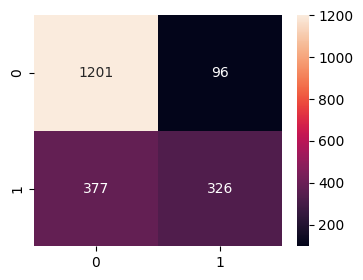

In [93]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred_smote, y_test)
import seaborn as sns

plt.figure(figsize=(4, 3))
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.heatmap(cm, annot=True, fmt="d")
plt.show()